# 8 避免过度绘图Avoid Overplotting
过度绘图是散点图及几天常见图表中最常见的问题之一。如下图所示当数据集很大时，散点图的点会重叠，使得图形变得不可读。在这篇文章中，提出了多种方法避免过度绘图。该章节主要内容有:
1. 减小点的大小 reduce the dot size
2. 使用透明度 use transparency
3. 使用二维密度图 2D density graph
4. 数据采样 Sample data
5. 特定数据显示 Show a specific group
6. 分组显示 Show putative structure
7. 多图显示 faceting
8. 数据分离 jitter
9. 3D显示 3D image plot 
10. 边际图 Marginal distribution plot

In [1]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
df=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
df=df.append(tmp1).append(tmp2)

# plot
sns.regplot(x='x', y='y', data=df, marker='o',fit_reg=False)
plt.xlabel('Value of X');
plt.ylabel('Value of Y');
plt.title('Overplotting looks like that:', loc='left');

## 1. 减小点的大小 reduce the dot size

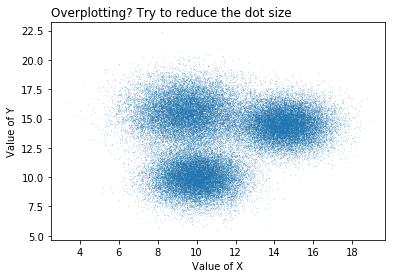

In [2]:
# Plot with small marker size scatter_kws控制点的大小
sns.regplot(x='x', y='y', data=df, marker='o',fit_reg=False, scatter_kws={"s":0.01})
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left');

## 2. 使用透明度 use transparency

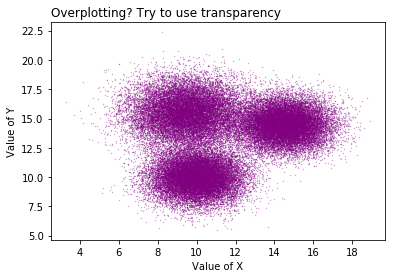

In [3]:
# Plot with transparency
sns.regplot(x='x', y='y', data=df, marker='o',fit_reg=False, scatter_kws={"color":"purple","alpha":0.5,"s":0.1})
 
# Titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to use transparency', loc='left');

## 3. 使用二维密度图 2D density graph

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


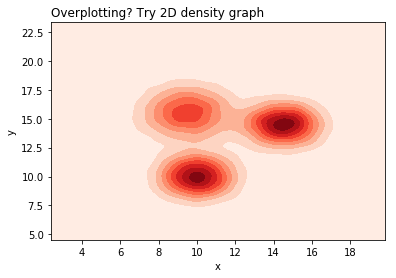

In [4]:
# 2D density plot, kdeplot调用二维密度函数
sns.kdeplot(df.x, df.y, cmap="Reds", shade=True)
plt.title('Overplotting? Try 2D density graph', loc='left');

## 4. 数据采样 Sample data

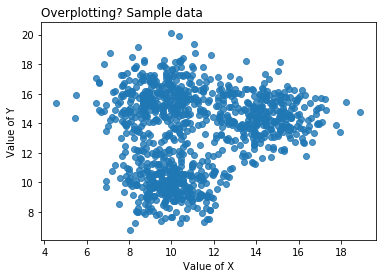

In [5]:
# Sample 1000 random lines 随机获得1000个点
df_sample=df.sample(1000)
 
# plot
sns.regplot(x='x', y='y', data=df_sample, marker='o',fit_reg=False)
plt.xlabel('Value of X');
plt.ylabel('Value of Y');
plt.title('Overplotting? Sample data', loc='left');

## 5. 特定数据显示 Show a specific group

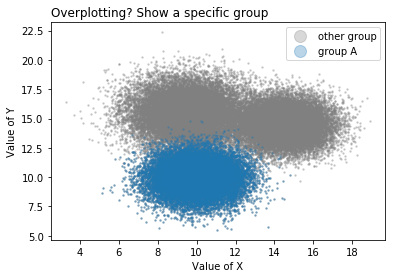

In [6]:
# Filter the data randomly 筛选数据
df_filtered = df[ df['group'] == 'A']
# 基于matplotlib绘制主要显示的类别数据
# Plot the whole dataset
plt.plot( df['x'], df['y'], linestyle='', marker='o', markersize=1.5, color="grey", alpha=0.3, label='other group')
# Add the group to study
plt.plot( df_filtered['x'], df_filtered['y'], linestyle='', marker='o', markersize=1.5, alpha=0.3, label='group A')
 
# Add titles and legend
plt.legend(markerscale=8)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Show a specific group', loc='left');

## 6. 分组显示 Show putative structure

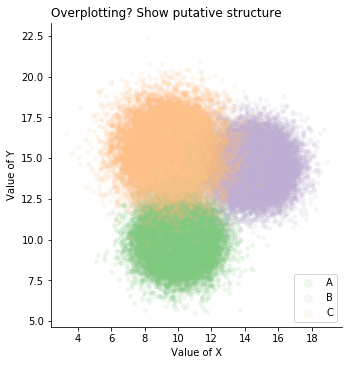

In [7]:
# Plot 不同组显示不同的颜色
sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='group', legend=False, palette="Accent", scatter_kws={"alpha":0.1,"s":15} )
 
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Show putative structure', loc='left');

## 7. 多图显示 faceting

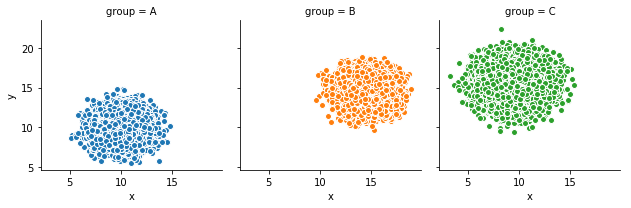

In [8]:
# Use seaborn for easy faceting
# 应用多绘图网格函数FacetGrid实例化group，其中根据col="group"分组。
g = sns.FacetGrid(df, col="group", hue="group")
g = (g.map(plt.scatter, "x", "y", edgecolor="w"))

## 8. 数据分离 jitter

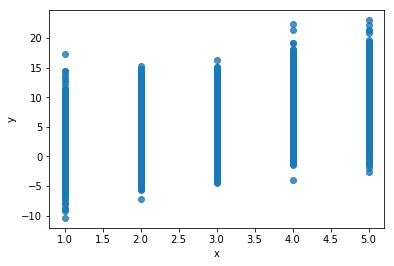

In [9]:
# Dataset:
a=np.concatenate([np.random.normal(2, 4, 1000), np.random.normal(4, 4, 1000), np.random.normal(1, 2, 500), np.random.normal(10, 2, 500), np.random.normal(8, 4, 1000), np.random.normal(10, 4, 1000)])
df=pd.DataFrame({'x': np.repeat( range(1,6), 1000), 'y': a })
 
# plot
sns.regplot(x='x', y='y', data=df, marker='o',fit_reg=False);

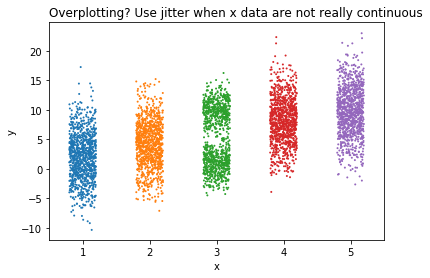

In [10]:
# A scatterplot with jitter
sns.stripplot(df.x, df.y, jitter=0.2, size=2)
plt.title('Overplotting? Use jitter when x data are not really continuous', loc='left');

## 9. 3D显示 3D image plot 

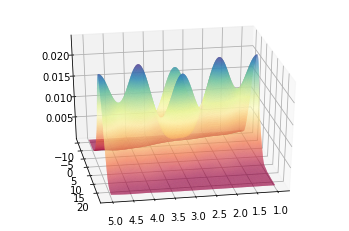

In [11]:
# libraries
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([df.x,df.y])
xi, yi = np.mgrid[ df.x.min():df.x.max():nbins*1j, df.y.min():df.y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)

## 10. 边际图 Marginal distribution plot

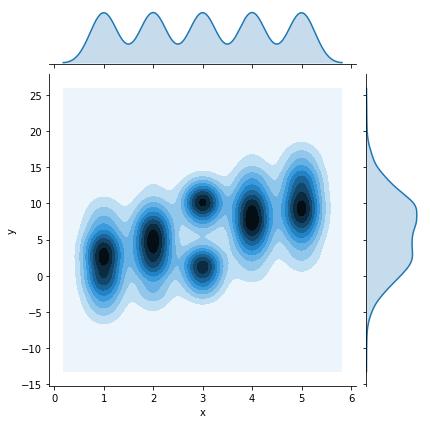

In [12]:
# 2D density + marginal distribution:
sns.jointplot(x=df.x, y=df.y, kind='kde');